# News articles data analysis.

### Notes:
- Before we make our wordclouds and apply classification and clustering methods to our data,
    we make sure to run *generate_train_test_sets.ipynb*, in order to create the train and test sets.
  

In [42]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words
import pandas as pd

df = pd.read_csv("data.tsv", sep='\t', encoding = 'ANSI')

Prototype of the function that is defined in the cell bellow.

<span style="color:DeepPink">**preprocess_article**</span>**(text)**  
&nbsp;&nbsp;Removes special characters from a given string object, removes stop words and lematizes words using WordNetLematizer().  
&nbsp;&nbsp;&nbsp;**Parameters: &nbsp;&nbsp;&nbsp;text : str**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
String object to process. 

&nbsp;&nbsp;&nbsp;**Returns: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;text : str**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Lematized string object without stopwords and several special characters.

In [43]:
import re
stop_words = list(stop_words)

""" In previous version of our project, the wordclouds below showed that 'said' word
    appears the most in the data, so we decided to remove it as it has no valuable meaning. """
stop_words.append('said')
wordnet_lemmatizer = WordNetLemmatizer()

""" Make sure that the text parameter and return variable are of string type. """
def preprocess_article(text: str) -> str:
    # Remove newlines and \r characters.
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    
    # Remove quotes
    text = text.replace('"', ' ')
   
    # Convert text to lowercase.
    text = text.lower()
    
    # Remove punctuation and special characters !?:;.,[]() .
    text = text.translate(str.maketrans('', '', '!?:\';.,[]()'))
   
    # Remove terminating 's characters.
    text = text.replace("'s", "")

    # Remove stop words. Note: do this first and then lemmatize because lemmatizing
    # can change words like 'has' to 'ha'.
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Lematize text with WordNetLemmatizer().
    text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split(' ')])
    
    # Remove all words with numbers in them (ie. 400bn, 512kbps etc.) .
    text = re.sub(r'\w*\d\w*', '', text).strip()
    
    return text

In [44]:
df['content'] = df.content.apply(preprocess_article)
df.head()

,id,title,content,category
0,0,Ad sales boost Time Warner profit\r\n,quarterly profit medium giant timewarner jumpe...,business
1,1,Dollar gains on Greenspan speech\r\n,dollar hit highest level euro month federal re...,business
2,2,Yukos unit buyer faces loan claim\r\n,owner embattled russian oil giant yukos ask bu...,business
3,3,High fuel prices hit BA's profits\r\n,british airway blamed high fuel price % drop p...,business
4,4,Pernod takeover talk lifts Domecq\r\n,share uk drink food firm allied domecq risen s...,business


In [164]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['content'], df['category'], test_size = 0.2, stratify = df['category'])


## Wordclouds per category

For the wordclouds we need all the data we've got.

In [1]:
from wordcloud import WordCloud


Define a word preprocessing function for the 'content' column.

In [321]:
def choose_category_content(category: str) -> str:
    articles_series = df[df['category'] == category]['content']
    words = ' '.join(articles_series)
    return words

Generate the wordclouds.

In [322]:
business_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('business'))

# entertainment_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('entertainment'))

# politics_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('politics'))

# sport_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('sport'))

# tech_wc = WordCloud(width=1920, background_color = 'white', height=1080).generate(choose_category_content('tech'))

### Business

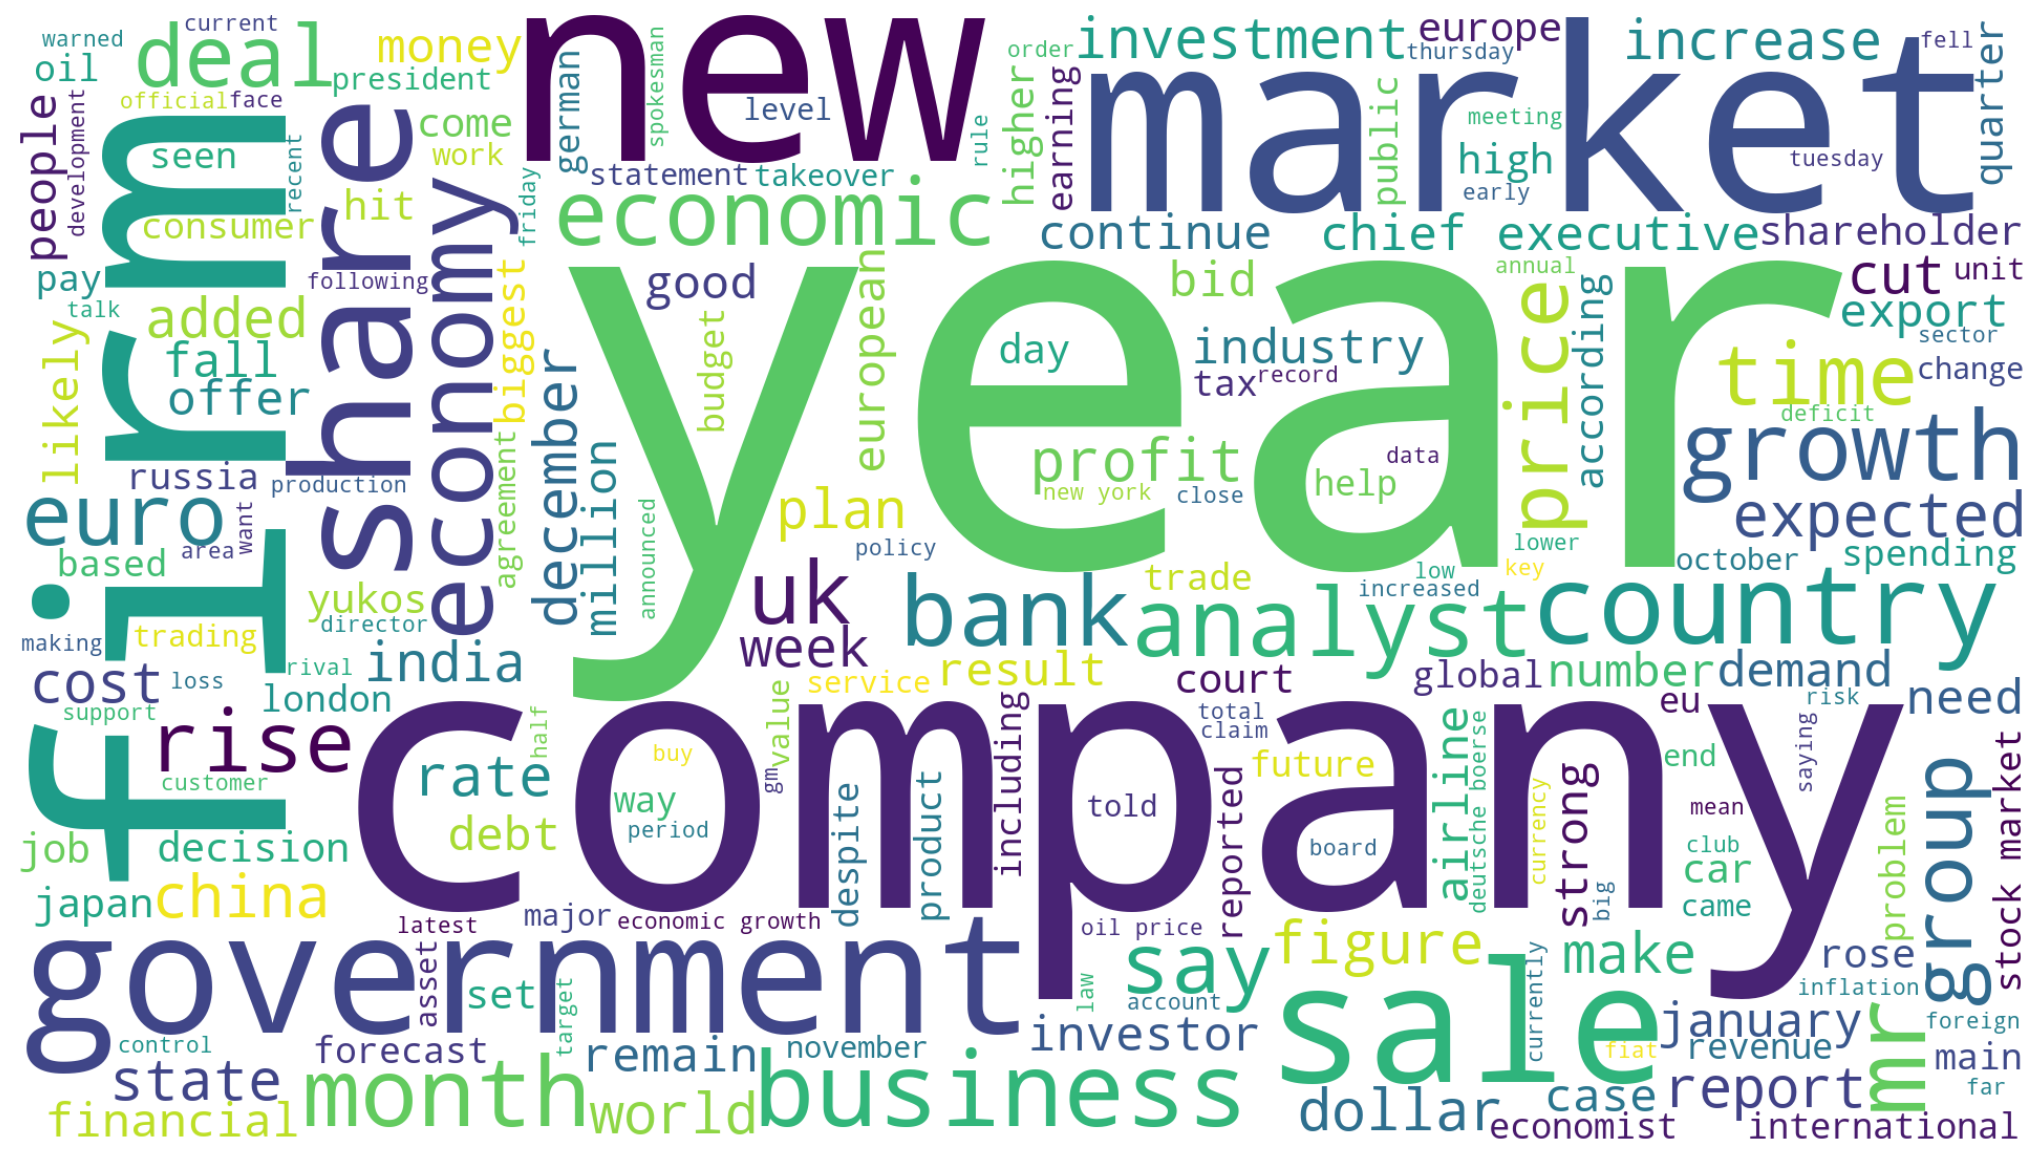

In [323]:
plt.figure(figsize=(20,10), dpi = 150)
plt.axis("off")
plt.imshow(business_wc, interpolation='bilinear')

### Entertainment

In [5]:
# plt.figure(figsize=(20,10), dpi = 150)
# plt.axis("off")
# plt.imshow(entertainment_wc, interpolation='bilinear')

### Politics

In [6]:
# plt.figure(figsize=(20,10), dpi = 150)
# plt.axis("off")
# plt.imshow(politics_wc, interpolation='bilinear')

### Sport

In [7]:
# plt.figure(figsize=(20,10), dpi = 150)
# plt.axis("off")
# plt.imshow(sport_wc, interpolation='bilinear')

### Tech

In [8]:
# plt.figure(figsize=(20,10), dpi = 150)
# plt.axis("off")
# plt.imshow(tech_wc, interpolation='bilinear')

## Classification

### Support Vector Machines (SVM)

In [134]:
from sklearn import datasets, svm, metrics
import sklearn.preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

Load the train/test sets into two dataframes.

In [89]:
train_df = pd.read_csv("train_set.tsv", sep='\t', encoding = 'ANSI')
# test_df = pd.read_csv("test_set.tsv", sep='\t', encoding = 'ANSI', index_col=0)

# print("Train set dataframe")
# display(train_df.head())
# print("Test set dataframe")
# display(test_df.head())

Code below this point is just tests, for now.

In [56]:
# train_df.head(5)

In [165]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)



In [167]:
count_vectorizer = CountVectorizer(max_features=2000)
# tfidf_vectorizer = TfidfVectorizer()

x_train = count_vectorizer.fit_transform(x_train)
x_train = x_train.toarray()

x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [168]:
x_test = count_vectorizer.fit_transform(x_test)
x_test = x_test.toarray()
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [151]:
classifier = svm.SVC(kernel='linear')

In [152]:
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [157]:
precisions = cross_val_score(classifier, x_train, y_train, cv=10, scoring='precision_micro')

In [158]:
precisions.mean()

0.9691011235955056

In [175]:
y_predict_test = classifier.predict(x_test)
le.fit(y_predict_test)
y_predict_test = le.transform(y_predict_test)
score_test = metrics.f1_score(y_test, y_predict_test, average = 'micro')


In [176]:
score_test

0.34606741573033706

In [24]:
C = [.0001, .001, .01, 1]
# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]
# kernel
kernel = ['rbf','linear']
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma
             }
display(random_grid)

{'C': [0.0001, 0.001, 0.01, 1],
 'kernel': ['rbf', 'linear'],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'degree': [1, 2, 3, 4, 5],
 'probability': [True]}

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


kfold = model_selection.KFold(n_splits=10, random_state=42)
model=RandomForestClassifier(n_estimators=50) 

results = model_selection.cross_val_score(estimator=model,
                                          X=features,
                                          y=labels,
                                          cv=kfold,
                                          scoring=scoring)